### TASK-1

### CUSTOMER SATISFACTION

### PART-1 What is the distribution of the number and types of special requests made by guests?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tabulate as tabulate
from datetime import date


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
data=pd.read_csv("D:\\ds_c4_s3_concept-main\\Bcgx\\DS1_C5_S5_Hotel Dataset (1).csv")

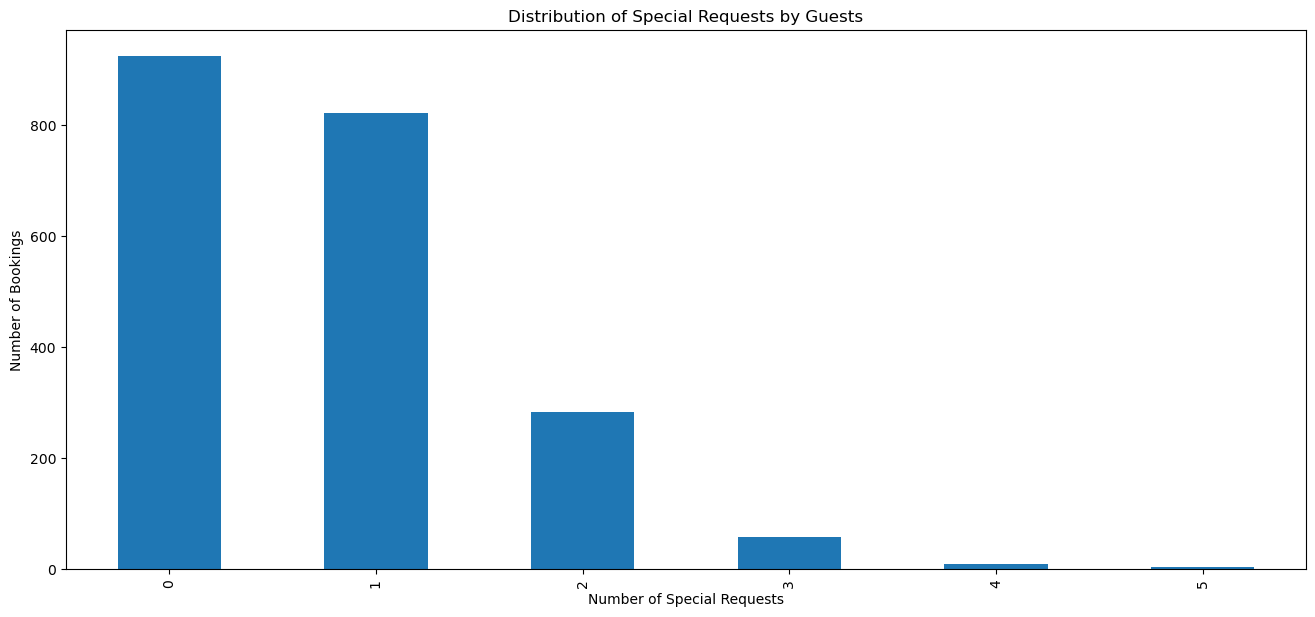

In [5]:
request_counts = data['total_of_special_requests'].value_counts().sort_index()

# Plot
fig,ax=plt.subplots(figsize=(16,7))
request_counts.plot(kind='bar')
plt.xlabel("Number of Special Requests")
plt.ylabel("Number of Bookings")
plt.title("Distribution of Special Requests by Guests")
plt.show()

Most Bookings Have Few or No Special Requests: The tallest bar is for bookings with '0' special requests, indicating that a significant number of guests did not make any special requests. The next tallest bar represents bookings with '1' special request, which is also quite high.

The Number of Bookings Decreases as Special Requests Increase: As we move towards the right of the chart, the height of the bars consistently decreases. This signifies that fewer and fewer bookings had a higher number of special requests.

Very Few Bookings Have a High Number of Special Requests: The bars for 3, 4, and 5 special requests are very short, indicating that it's quite rare for guests to make a large number of special requests.

### PART-2 Is there any relation between special requests made by customers and the average daily rate? Additionally, explore customer preferences and expectations for different room types.

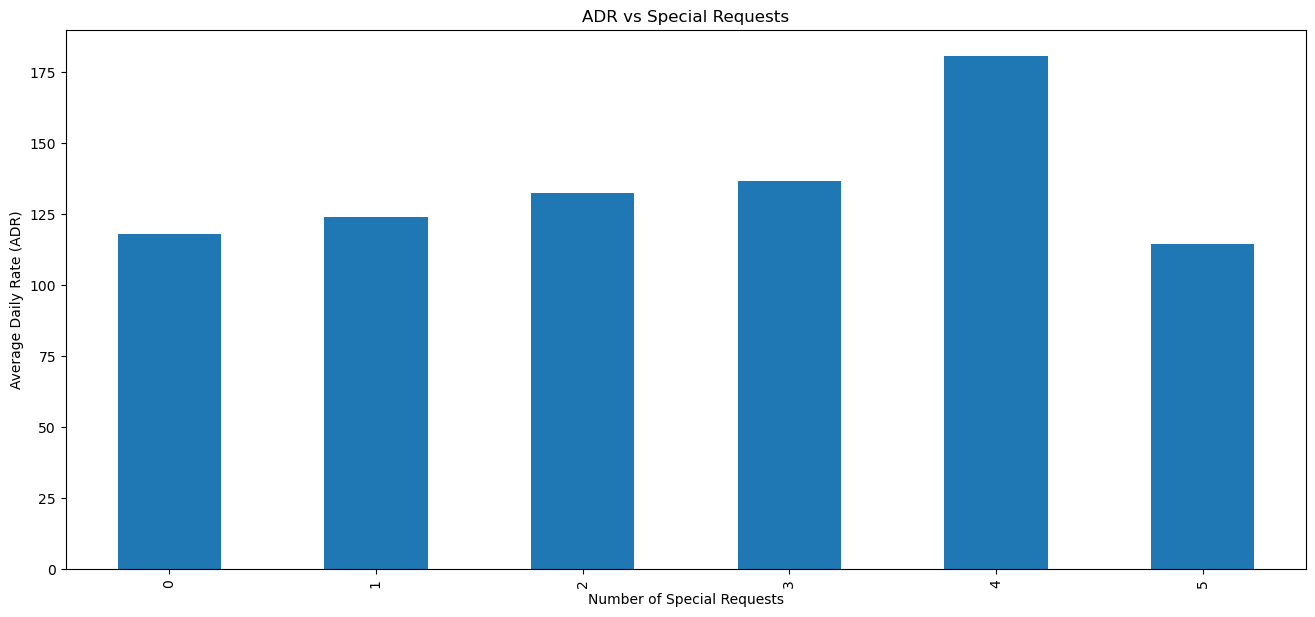

In [6]:
adr_by_requests = data.groupby('total_of_special_requests')['adr'].mean()

# Plot
fig,ax=plt.subplots(figsize=(16,7))
adr_by_requests.plot(kind='bar')
plt.xlabel('Number of Special Requests')
plt.ylabel('Average Daily Rate (ADR)')
plt.title('ADR vs Special Requests')
plt.show()

ADR Varies with the Number of Special Requests: The height of the bars, representing the ADR, changes as the number of special requests increases. This suggests that there isn't a straightforward linear relationship where more special requests consistently lead to a higher or lower ADR.

Highest ADR for Bookings with Four Special Requests: The tallest bar is for bookings with '4' special requests, indicating that, on average, these bookings had the highest Average Daily Rate compared to bookings with any other number of special requests.

Relatively High ADR for Zero and Three Special Requests: Bookings with '0' and '3' special requests also show relatively high average daily rates.

In [8]:
data['room_type_mismatch'] = data['reserved_room_type'] != data['assigned_room_type']


In [9]:
room_request_stats = data.groupby('reserved_room_type')['total_of_special_requests'].mean()


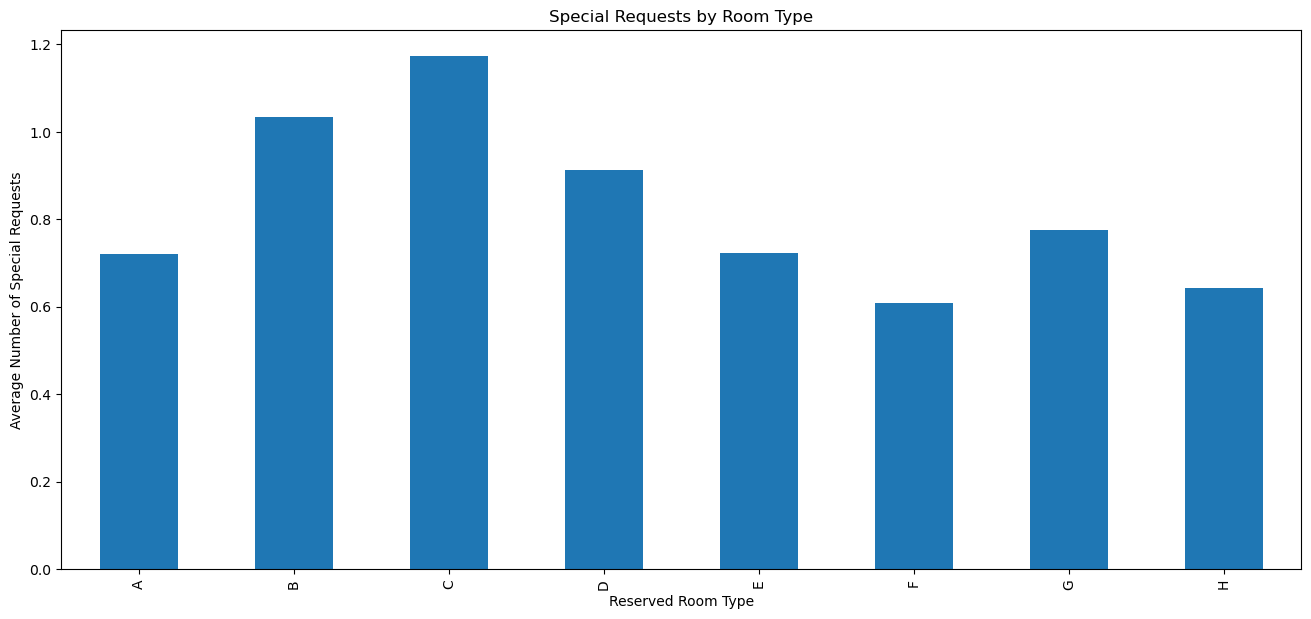

In [10]:
fig,ax=plt.subplots(figsize=(16,7))

room_request_stats.plot(kind='bar')
plt.xlabel('Reserved Room Type')
plt.ylabel('Average Number of Special Requests')
plt.title('Special Requests by Room Type')
plt.show()

Room Type C Has the Highest Average Number of Special Requests: The tallest bar corresponds to room type C, indicating that, on average, bookings for this room type tend to have the most special requests compared to other room types.

Room Type F Has the Lowest Average Number of Special Requests: The shortest bar is for room type F, suggesting that bookings for this room type typically involve the fewest special requests on average.

Room Types A, E, G, and H Have Moderate Average Special Requests: The bars for room types A, E, G, and H are of intermediate height, suggesting a moderate average number of special requests associated with these room types.

### TASK-2

### Marketing and Sales Optimization

### PART-1    Which marketing channels and market segments contribute the most to successful bookings?

In [11]:
successful = data[data['is_canceled'] == 0]


In [12]:
market_counts = successful['market_segment'].value_counts()


In [13]:
channel_counts = successful['distribution_channel'].value_counts()


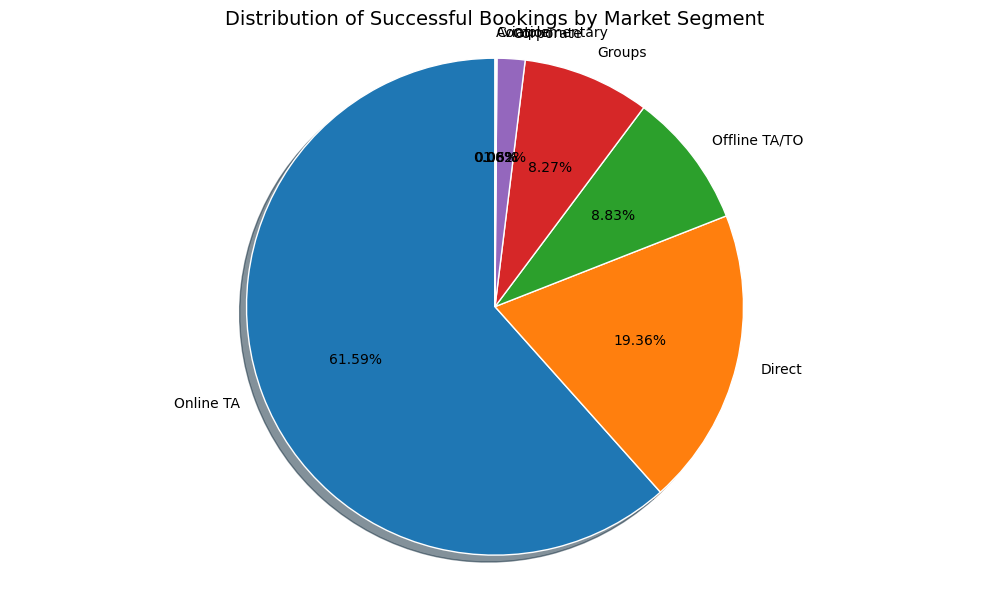

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))

# Pie chart
ax.pie(
    market_counts,
    labels=market_counts.index,
    autopct="%0.2f%%",
    startangle=90,
    shadow=True,
    wedgeprops={'edgecolor': 'white'}
)

# Add title
ax.set_title("Distribution of Successful Bookings by Market Segment", fontsize=14)

# Equal aspect ratio ensures the pie is a circle
ax.axis('equal')

plt.tight_layout()
plt.show()

Online TA (Online Travel Agents) Dominates Bookings: The largest slice of the pie, accounting for a significant 61.59% of all bookings, comes through Online Travel Agents. This indicates that online platforms like Booking.com, Expedia, etc., are the most popular way for guests to make reservations.

Direct Bookings are the Second Largest Channel: The second largest slice, representing 19.36% of bookings, comes directly to the hotel (e.g., through the hotel's website, phone, or in person). This is a substantial portion, highlighting the importance of the hotel's own booking channels.

Offline TA/TO (Offline Travel Agents/Tour Operators) Contribute a Notable Portion: Bookings made through traditional, offline travel agents and tour operators account for 8.83% of the total. While smaller than online TAs and direct bookings, this channel still represents a significant segment.

Groups Account for a Smaller Percentage: Bookings classified as "Groups" make up 8.27% of the total bookings. This suggests that group reservations are a smaller but still relevant part of the overall business.

Corporate Bookings are a Minor Segment: The "Corporate" segment contributes 1.82% to the total bookings, indicating that business travelers booking through corporate channels form a relatively small portion of the overall reservations.

Complementary and Aviation Channels Have Very Small Shares: The "Complementary" and "Aviation" channels represent very small percentages of the bookings, at 0.08% and 0.06% respectively. These likely refer to free stays or bookings made through airline partnerships, and they constitute a negligible part of the overall booking volume.

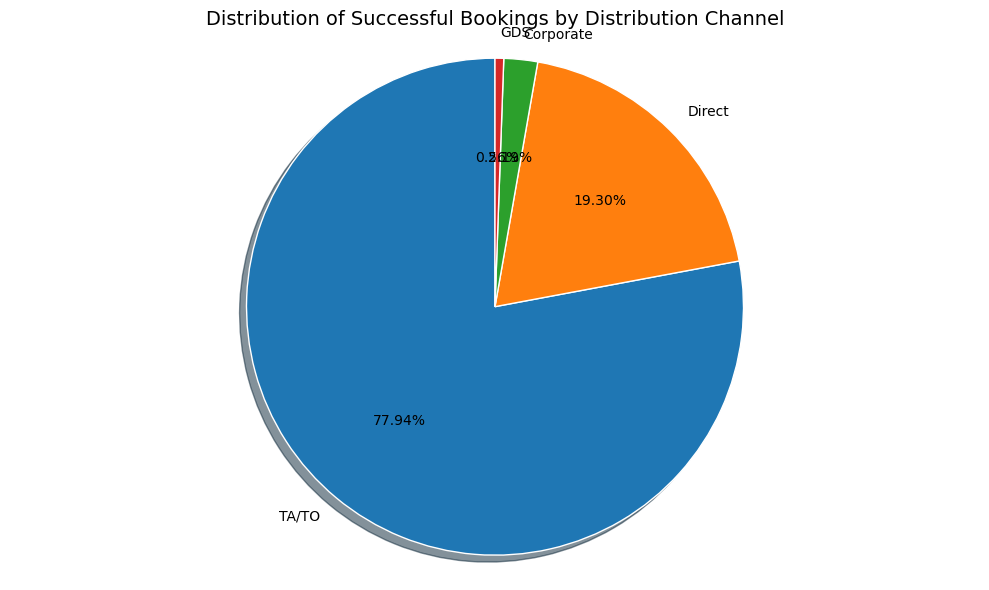

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))

# Pie chart
ax.pie(
    channel_counts,
    labels=channel_counts.index,
    autopct="%0.2f%%",
    startangle=90,
    shadow=True,
    wedgeprops={'edgecolor': 'white'}
)

# Add title
ax.set_title("Distribution of Successful Bookings by Distribution Channel", fontsize=14)

# Equal aspect ratio ensures the pie is a circle
ax.axis('equal')

plt.tight_layout()
plt.show()

TA/TO (Travel Agents/Tour Operators) Dominate Successful Bookings: The largest slice of the pie, accounting for a significant 77.94% of all successful bookings, comes through Travel Agents and Tour Operators. This indicates that this channel is by far the most effective in generating confirmed reservations.



Direct Bookings Contribute a Notable Portion: The second largest slice, representing 19.30% of successful bookings, comes directly to the hotel (e.g., through the hotel's website, phone, or in person). While significantly smaller than bookings from TA/TOs, direct bookings still represent a substantial portion of confirmed reservations.

Corporate Bookings Represent a Small Percentage: Bookings classified as "Corporate" make up 2.33% of the total successful bookings. This suggests that business travelers booking through corporate channels form a relatively small part of the confirmed reservations.

GDS (Global Distribution Systems) Contribute a Minimal Share: The "GDS" channel represents a very small percentage of the successful bookings, at 0.43%. Global Distribution Systems, which are often used by travel agents and corporate travel departments, appear to be a minor source of confirmed reservations in this context.

### PART-2  Which amenities or services have the highest impact on the average daily rate (ADR)?

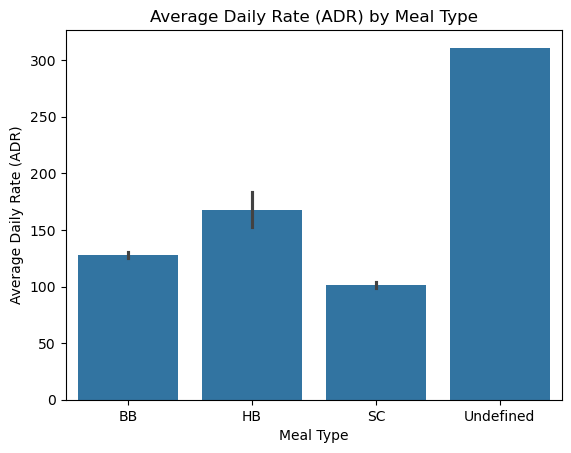

In [23]:
sns.barplot(x="meal", y="adr", data=data, estimator='mean')
plt.title("Average Daily Rate (ADR) by Meal Type")
plt.xlabel("Meal Type")
plt.ylabel("Average Daily Rate (ADR)")
plt.show()

 Interpretation = Meal direct Effect ADR rate as per graph HB and undefined meal order by customer those ADR very high

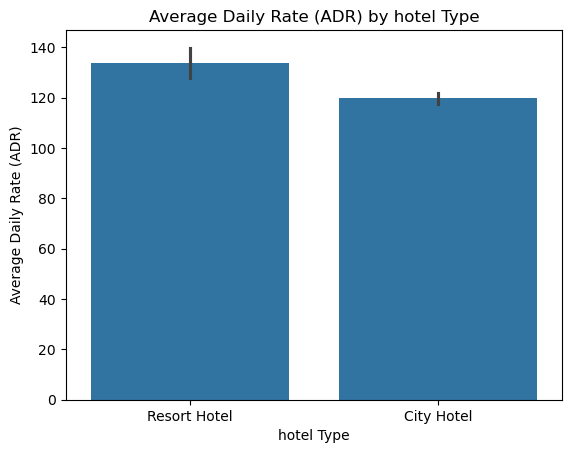

In [25]:
sns.barplot(x="hotel", y="adr", data=data, estimator='mean')
plt.title("Average Daily Rate (ADR) by hotel Type")
plt.xlabel("hotel Type")
plt.ylabel("Average Daily Rate (ADR)")
plt.show()

Interpretations= Resort Hotel ADR rate very high instead of City Hotel

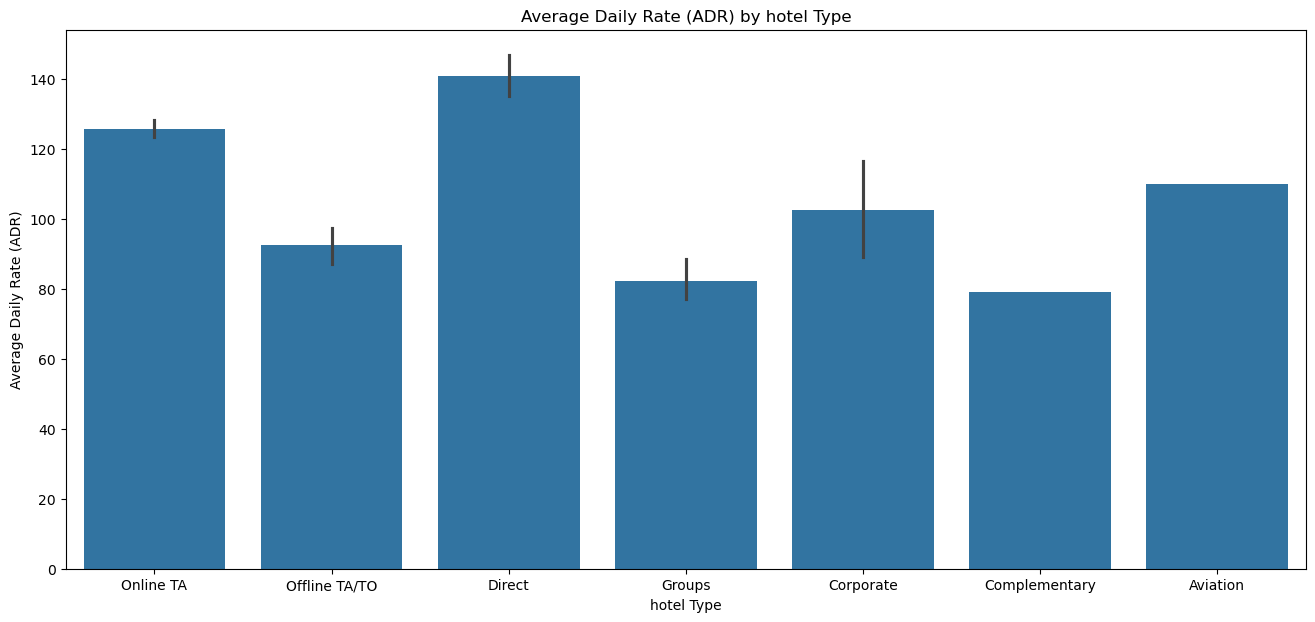

In [27]:
fig,ax=plt.subplots(figsize=(16,7))
sns.barplot(x="market_segment", y="adr", data=data, estimator='mean')
plt.title("Average Daily Rate (ADR) by hotel Type")
plt.xlabel("hotel Type")
plt.ylabel("Average Daily Rate (ADR)")
plt.show()

Interpretations= Customer who come Direct and through Online TA those customer ADR rate is very high

### PART-3  What is the distribution of bookings across various distribution channels?

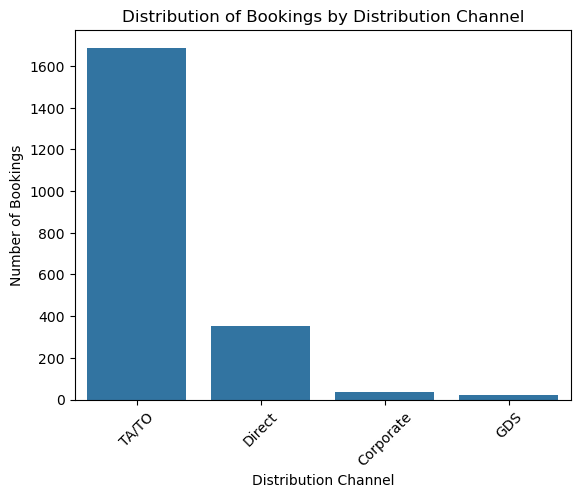

In [28]:
sns.countplot(x="distribution_channel", data=data, order=data['distribution_channel'].value_counts().index)
plt.title("Distribution of Bookings by Distribution Channel")
plt.xlabel("Distribution Channel")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45)
plt.show()

TA/TO (Travel Agents/Tour Operators) is the dominant booking channel. It accounts for a significantly larger number of bookings (approximately 1700) compared to all other channels. This suggests that a substantial portion of the business comes through intermediaries.

Direct bookings are the second most significant channel. With around 350 bookings, the direct channel represents a notable segment of customers who book directly with the service provider.

Corporate and GDS (Global Distribution Systems) channels contribute a relatively small number of bookings. Both of these channels show a much lower volume of bookings (less than 50 each) compared to TA/TO and Direct channels

### TASK-3

### Summary

##### 1. Booking Trends by Year & Month

2016 was the peak year for bookings (748 bookings, 46.87%).

June saw the highest monthly bookings (209 bookings, 13.10%).

Booking volume remained relatively steady across different days of the month.



#### 2. Booking Cancellation Patterns

Most cancellations occurred for bookings with 0–100 lead days, especially with longer lead times.

No-deposit bookings had the highest cancellation rate—likely due to the absence of commitment.

Online Travel Agents (OTA) had the highest cancellation rate compared to Direct, Corporate, or GDS.

New customers were more prone to cancel, while repeated guests showed more reliability.

Cancellations were common for bookings with extreme ADRs (too high or too low).

Weekday bookings, especially from Tuesday to Friday, had higher cancellation counts.



##### 3. Customer Type & Booking Behavior

Transient and Transient-party customers dominate bookings—especially through TA/TO channels.

Group bookings had the shortest lead times, while Transient-party bookings had the longest.

Contract customers had varied lead times, often influenced by agreement terms.

Repeat guests canceled less and had more consistent booking behaviors.

#### 4. Market Segment & Distribution Channel Insights

Online TA is the largest channel (61.59% of bookings), followed by Direct (19.36%).

Corporate, Complementary, and Aviation segments contribute minor shares (<2% each).

TA/TO also leads in volume across all customer types.

Group customers prefer Complementary market segments.

Transient-party customers align more with Groups and Online TA/TO segments.

#####  5. Average Daily Rate (ADR) Analysis

Mid-year months (July–August) show seasonal ADR spikes, likely due to summer holidays or local events.

ADR tends to decrease with longer lead times, suggesting last-minute bookings are more profitable.

Room types G, H, and F have the highest ADRs, indicating premium pricing.

Meal plans like HB and undefined meals have higher ADRs.

Resort Hotels consistently have higher ADRs than City Hotels.

#### 6. Revenue & Operational Challenges

High variability in bookings complicates revenue forecasting and staffing.

Frequent reservation changes increase staff workload and risk of guest dissatisfaction.

Waiting list bookings show zero cancellations, suggesting these customers are highly committed.

#### 7. Guest Stay Patterns

Most guests stay 0–2 nights (weekdays or weekends).

Repeated guests are a small segment across all stay durations.

Very few bookings last more than 3 nights, especially beyond 10 nights.

#### 8. Special Requests & Commitment

Most bookings have 0 or 1 special request.

Bookings with 4 special requests had the highest ADR, suggesting more personalized or premium stays.

Room type C had the most average special requests; Room F had the least.

More special requests correlate with lower cancellation rates—guests are more engaged.



#### 9. Strategic Insights

Target repeat guests with loyalty programs—they cancel less and book reliably.

Encourage personalization through special requests to reduce cancellation.

Short-lead promotions and deposit incentives can reduce cancellations from high-risk customers.

Direct and GDS channels yield higher ADRs, making them valuable for revenue maximization.



# Final Business Conclusions

#### 1. Customer Retention Is Key

Repeated guests are significantly less likely to cancel, more loyal, and often make more engaged bookings (e.g., with special requests).

Focused retention strategies (loyalty programs, exclusive offers) will help reduce cancellations and stabilize revenue.

#### 2. Booking Source Significantly Impacts Performance

Online Travel Agents (OTAs) dominate booking volume but also have the highest cancellation rates.

Direct and GDS channels offer higher ADRs and more reliable customers. Prioritize and incentivize these channels to improve profitability.

#### 3. High Cancellation Rates Are Tied to Booking Conditions

No-deposit and long lead-time bookings are strongly associated with cancellations.

Enforcing deposit policies, especially for long-lead bookings, and offering flexible terms for short-lead bookings can reduce risk.

####  4. Personalization Enhances Booking Commitment

Bookings with more special requests are less likely to cancel and tend to have higher ADRs.

Promoting add-ons and customization not only increases revenue but also lowers cancellation likelihood.

####  5. Seasonality & Timing Play a Major Role

June to August is the high-demand season, with both high bookings and cancellations.

Dynamic pricing strategies during peak months can maximize ADR and revenue.

### 6. Room Type & Meal Plan Influence Revenue

Premium room types and meal plans (like HB) command higher ADRs.

Encouraging upsells and packages can optimize room revenue, especially during high-demand periods.

### 7. Operational Improvements Needed

High booking volatility (frequent changes and cancellations) increases staff workload and forecasting challenges.

Streamlining booking policies and improving prediction models can enhance efficiency and guest experience.

#### 8. Strategic Focus Areas

Increase Direct Bookings: Through digital campaigns, SEO, and loyalty incentives.

Reduce Cancellations: By targeting risky bookings with flexible but commitment-driven policies.

Maximize ADR: Via segmentation, upselling, and channel optimization.

